In [3]:
%%capture
from tqdm import tqdm_notebook as tqdm

import pandas as pd

import time
t1 = time.time()

import os
import numpy as np

from pandas import ExcelWriter
from pandas import ExcelFile

from datetime import datetime

from matplotlib import cm
from pylab import rcParams
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.interpolate import interp1d
import scipy.interpolate as spi
from scipy.interpolate import splrep, splev
import scipy.cluster.hierarchy as spc

import scipy.io
import math

from sklearn import metrics

In [4]:
file_dir = os.path.join('/Users/digisha/Downloads/Fatigue_project/data')
file_name = os.path.join(file_dir, 'VAS_data_for_Digisha_073119.xlsx')
df = pd.read_excel(file_name, sheetname = "Sheet1")

#df = pd.read_excel(file_with_data, sheetname=sheet_with_data)

df.head()

/Applications/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


,guid,subject_id,question_id,answer,other,is_checked,timestamp
0,473edf673e4c41e6bd329e01fcd0926b,1,1600,4,NaN,NaN,05-31-2018 08:45:51
1,11f45a3f6a5a456aa6d7e238fcf5801d,1,1601,0,NaN,NaN,05-31-2018 08:46:01
2,edb12413c16c457581358b8174855950,1,1602,0,NaN,NaN,05-31-2018 08:46:09
3,6fa93d8d070c4e3a89288038e5e99579,1,1603,0,NaN,NaN,05-31-2018 08:46:17
4,efec8a7b09a5499a85a4008bc606ef7f,1,1600,6,NaN,NaN,05-31-2018 16:16:58


In [5]:
#changing datatypes, time stamp in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.drop(['guid', 'other', 'is_checked'], axis=1)

In [6]:
#only depression fatigue questionnare considererd
mask = (df['subject_id'] != 99998)
df = df.loc[mask].reset_index(drop=True)
#df['time'] = [t.time() for t in df['timestamp']]#.progress_apply(lambda x: x.timestamp)
#df['time'] = df['time'].apply(lambda x: x.strftime('%H:%M:%S'))
df.head()

,subject_id,question_id,answer,timestamp
0,1,1600,4,2018-05-31 08:45:51
1,1,1601,0,2018-05-31 08:46:01
2,1,1602,0,2018-05-31 08:46:09
3,1,1603,0,2018-05-31 08:46:17
4,1,1600,6,2018-05-31 16:16:58


In [7]:
datetime_object = datetime.strptime('00:00:00', '%H:%M:%S')
df['answer']=df.answer.astype('int64')
df['hour'] = 0.00

with tqdm(total=len(df)) as pbar:
    for i in range(len(df)):
        df['hour'][i] = (df['timestamp'][i] - datetime_object).seconds/(60*60)
        df['hour'][i] = df['hour'][i].round(2)
        pbar.update(1)
    
df.head()

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,subject_id,question_id,answer,timestamp,hour
0,1,1600,4,2018-05-31 08:45:51,8.76
1,1,1601,0,2018-05-31 08:46:01,8.77
2,1,1602,0,2018-05-31 08:46:09,8.77
3,1,1603,0,2018-05-31 08:46:17,8.77
4,1,1600,6,2018-05-31 16:16:58,16.28


In [8]:
# date column added to know if the questionnaire is a part of the same day or the next
df['date'] = [d.date() for d in df['timestamp']]

In [9]:
k = df.subject_id.unique()
print(np.sort(k))
len(k)

[ 1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 22 23 24 25 26
 27 29 30 31 34 35 36 37 39 40 41 43 45 47 48 50 52 53]


42

In [10]:
df['time'] = 0
k = 0
df['time'] = df['time'].astype('float')

patient = df.subject_id.unique()

qid = [1600,1601,1602,1603]

with tqdm(total= (len(patient)*len(qid))) as pbar:
    for q in qid:
        for pat in patient:
            count = 0
            for i in range(0,len(df)):
                if q == df['question_id'][i]:
                    if pat == df['subject_id'][i]:
                        if count == 0:
                            df['time'][i] = 0 + (df['hour'][i]/24)
                            count+= 1
                            k = i
                        else:
                            df['time'][i] = (df['timestamp'][i] - df['timestamp'][k]).days + (df['hour'][i]/24)
            pbar.update(1)

df['time'] = df['time'].round(3)
#df = df.sort_values(['subject_id', 'time'], ascending=[True, True])
df.head(7)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,subject_id,question_id,answer,timestamp,hour,date,time
0,1,1600,4,2018-05-31 08:45:51,8.76,2018-05-31,0.365
1,1,1601,0,2018-05-31 08:46:01,8.77,2018-05-31,0.365
2,1,1602,0,2018-05-31 08:46:09,8.77,2018-05-31,0.365
3,1,1603,0,2018-05-31 08:46:17,8.77,2018-05-31,0.365
4,1,1600,6,2018-05-31 16:16:58,16.28,2018-05-31,0.678
5,1,1601,0,2018-05-31 16:17:04,16.28,2018-05-31,0.678
6,1,1602,1,2018-05-31 16:17:20,16.29,2018-05-31,0.679


In [11]:
mask = (df['question_id'] == 1600)
df_00 = df.loc[mask].reset_index(drop=True)

mask = (df['question_id'] == 1601)
df_01 = df.loc[mask].reset_index(drop=True)

mask = (df['question_id'] == 1602)
df_02 = df.loc[mask].reset_index(drop=True)

mask = (df['question_id'] == 1603)
df_03 = df.loc[mask].reset_index(drop=True)

In [12]:
df_00 = df_00.drop(['timestamp', 'hour', 'date', "question_id"], axis=1)
df_01 = df_01.drop(['timestamp', 'hour', 'date', "question_id"], axis=1)
df_02 = df_02.drop(['timestamp', 'hour', 'date', "question_id"], axis=1)
df_03 = df_03.drop(['timestamp', 'hour', 'date', "question_id"], axis=1)


In [13]:
UniqueNames = df.subject_id.unique()

#create a data frame dictionary to store your data frames
DataFrameDict = {elem : pd.DataFrame for elem in UniqueNames}
Dict = {elem : pd.DataFrame for elem in UniqueNames}

In [14]:
# Utility Functions

color_lst = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_lst.extend(['firebrick', 'olive', 'indigo', 'khaki', 'teal', 'saddlebrown', 
                 'skyblue', 'coral', 'darkorange', 'lime', 'darkorchid', 'dimgray'])

def plot_cluster(traj_lst, cluster_lst):
    '''
    Plots given trajectories with a color that is specific for every trajectory's own cluster index.
    Outlier trajectories which are specified with -1 in `cluster_lst` are plotted dashed with black color
    '''
    cluster_count = np.max(cluster_lst) + 1
    
    for traj, cluster in zip(traj_lst, cluster_lst):
        
        if cluster == -1:
            #pass
            # Means it it a noisy trajectory, paint it black
            plt.plot(traj[:, 0], traj[:, 1], c='k', linestyle='dashed')
        
        else:
            plt.plot(traj[:, 0], traj[:, 1], c=color_lst[cluster % len(color_lst)])
    plt.show()

# Some visualization stuff, not so important
sns.set()
plt.rcParams['figure.figsize'] = (24, 12)

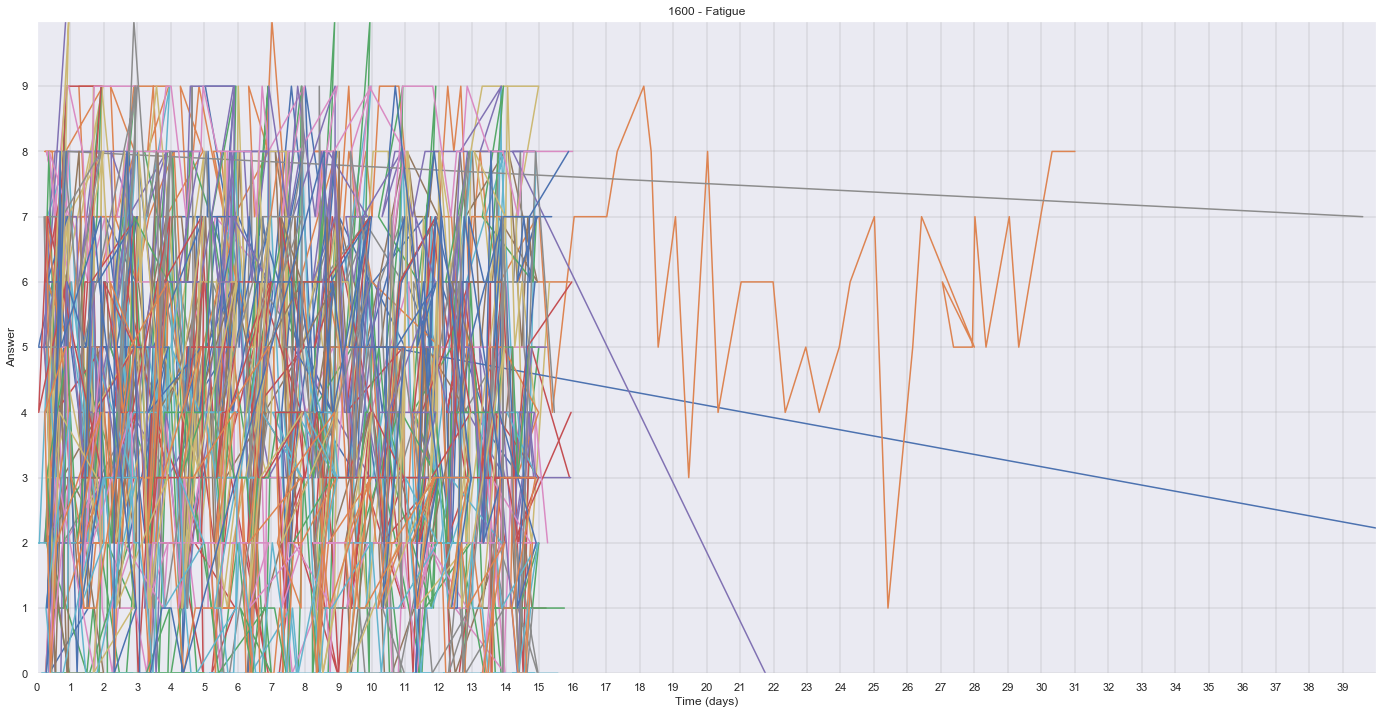

In [15]:
for key in DataFrameDict.keys():
    DataFrameDict[key] = df_00[:][df_00.subject_id == key]

#Dict = {}
traj_lst1 = []
yt1 = []

with tqdm(total=len(UniqueNames)) as pbar:
    for key in UniqueNames:
        x = DataFrameDict[key]['time'].values
        y = DataFrameDict[key]['answer'].values
        np.set_printoptions(formatter={'float_kind':'{:0.3f}'.format})
        xnew = np.arange(0,14,1/48)
        intfunc = spi.interp1d(x,y,kind = 'linear', fill_value=(y.min(), y.max()), bounds_error=False)
        ynew = intfunc(xnew)
        xnew = xnew.round(3)
        ynew = ynew.round(3)
        X = np.array(list(zip(x, y)))
        traj_lst1.append(X)
        yt1.append(ynew)
        pbar.update(1)

for traj in traj_lst1:
    plt.plot(traj[:, 0], traj[:, 1])
    
plt.ylim(0, 10)
plt.xlim(0, 40)
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, 40, 1))
plt.xlabel('Time (days)')
plt.ylabel('Answer')
plt.title('1600 - Fatigue')
plt.grid(color='grey', linestyle='-', linewidth=0.25)

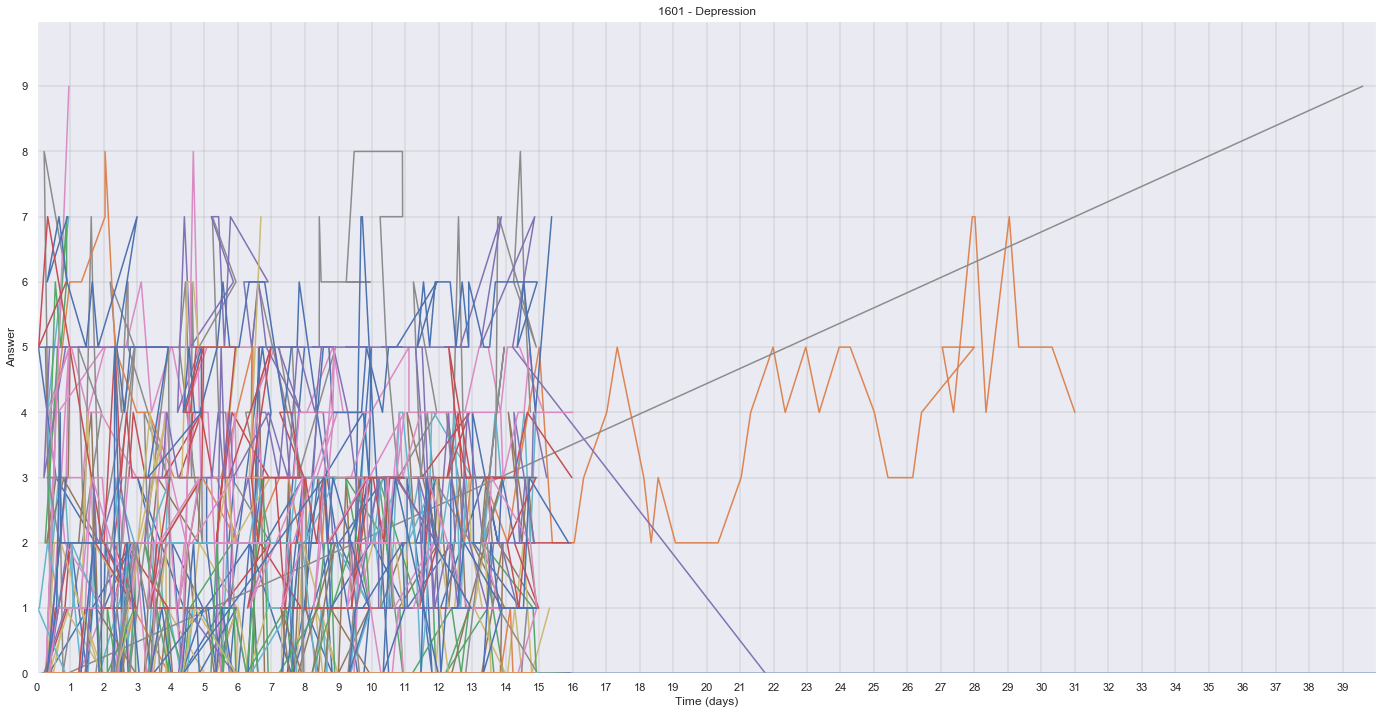

In [16]:
for key in DataFrameDict.keys():
    DataFrameDict[key] = df_01[:][df_01.subject_id == key]

#Dict = {}
traj_lst2 = []
yt2 = []

with tqdm(total= len(UniqueNames)) as pbar:
    for key in UniqueNames:
        #print(DataFrameDict[key])
        x = DataFrameDict[key]['time'].values
        y = DataFrameDict[key]['answer'].values
        np.set_printoptions(formatter={'float_kind':'{:0.3f}'.format})
        xnew = np.arange(0,14,1/48)
        intfunc = spi.interp1d(x,y,kind = 'linear', fill_value=(y.min(), y.max()), bounds_error=False)
        ynew = intfunc(xnew)
        xnew = xnew.round(3)
        ynew = ynew.round(3)
        X = np.array(list(zip(x, y)))
        traj_lst2.append(X)
        yt2.append(ynew)
        pbar.update(1)

for traj in traj_lst2:
    plt.plot(traj[:, 0], traj[:, 1])
    
plt.ylim(0, 10)
plt.xlim(0, 40)
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, 40, 1))
plt.xlabel('Time (days)')
plt.ylabel('Answer')
plt.title('1601 - Depression')
plt.grid(color='grey', linestyle='-', linewidth=0.25)

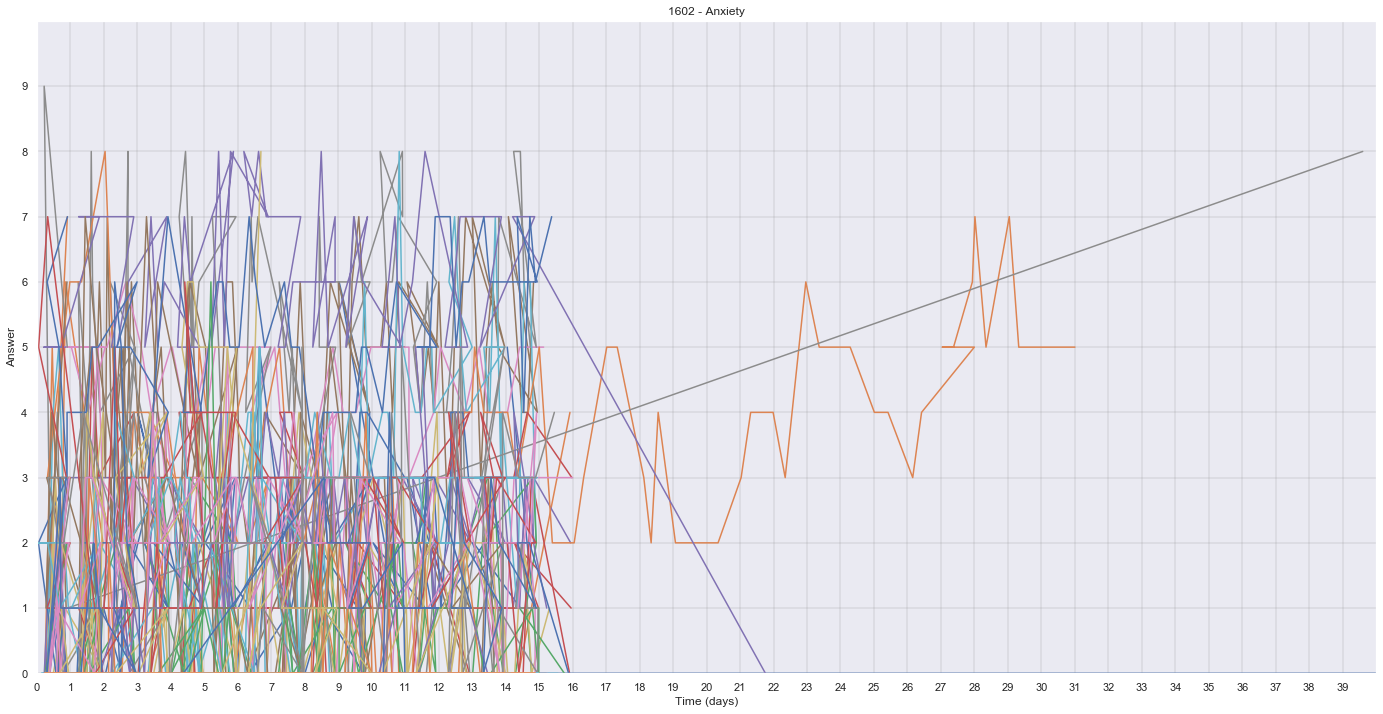

In [17]:
for key in DataFrameDict.keys():
    DataFrameDict[key] = df_02[:][df_02.subject_id == key]

#Dict = {}
traj_lst3 = []
yt3 = []

with tqdm(total= len(UniqueNames)) as pbar:
    for key in UniqueNames:
        #print(DataFrameDict[key])
        x = DataFrameDict[key]['time'].values
        y = DataFrameDict[key]['answer'].values
        np.set_printoptions(formatter={'float_kind':'{:0.3f}'.format})
        xnew = np.arange(0,14,1/48)
        intfunc = spi.interp1d(x,y,kind = 'linear', fill_value=(y.min(), y.max()), bounds_error=False)
        ynew = intfunc(xnew)
        xnew = xnew.round(3)
        ynew = ynew.round(3)
        X = np.array(list(zip(x, y)))
        traj_lst3.append(X)
        yt3.append(ynew)
        pbar.update(1)

for traj in traj_lst3:
    plt.plot(traj[:, 0], traj[:, 1])
    
plt.ylim(0, 10)
plt.xlim(0, 40)
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, 40, 1))
plt.xlabel('Time (days)')
plt.ylabel('Answer')
plt.title('1602 - Anxiety')
plt.grid(color='grey', linestyle='-', linewidth=0.25)

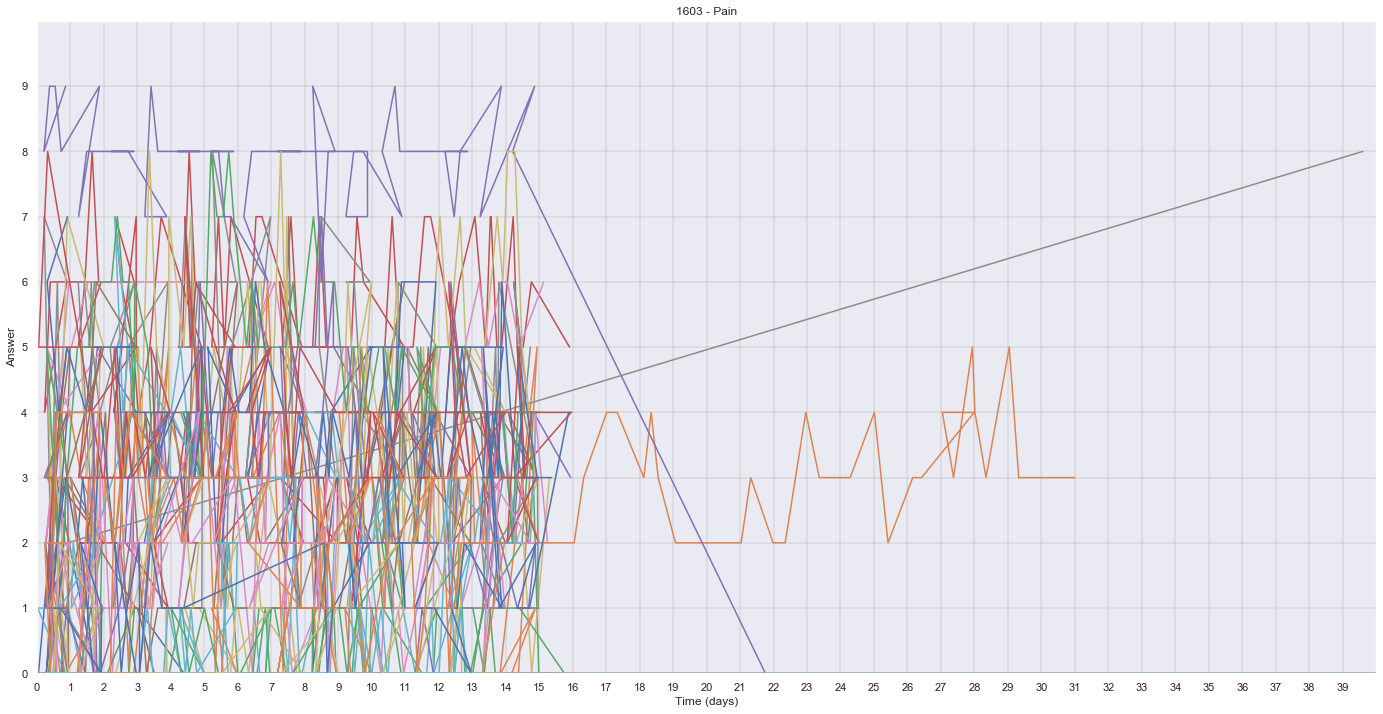

In [18]:
for key in DataFrameDict.keys():
    DataFrameDict[key] = df_03[:][df_03.subject_id == key]

#Dict = {}
traj_lst4 = []
yt4 = []

with tqdm(total= len(UniqueNames)) as pbar:
    for key in UniqueNames:
        #print(DataFrameDict[key])
        x = DataFrameDict[key]['time'].values
        y = DataFrameDict[key]['answer'].values
        np.set_printoptions(formatter={'float_kind':'{:0.3f}'.format})
        xnew = np.arange(0,14,1/48)
        intfunc = spi.interp1d(x,y,kind = 'linear', fill_value=(y.min(), y.max()), bounds_error=False)
        ynew = intfunc(xnew)
        xnew = xnew.round(3)
        ynew = ynew.round(3)
        X = np.array(list(zip(x, y)))
        traj_lst4.append(X)
        yt4.append(ynew)
        pbar.update(1)

for traj in traj_lst4:
    plt.plot(traj[:, 0], traj[:, 1])
    
plt.ylim(0, 10)
plt.xlim(0, 40)
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, 40, 1))
plt.xlabel('Time (days)')
plt.ylabel('Answer')
plt.title('1603 - Pain')
plt.grid(color='grey', linestyle='-', linewidth=0.25)

In [17]:
def corr_dist(u, v):
    #d = (np.corrcoef(yt[u], yt[v])[0])[1].round(3)
    corr_matrix = np.corrcoef(u, v)
    corr = corr_matrix[1][0]
    pdist = spc.distance.pdist(corr_matrix)
    if math.isnan(pdist):
            pdist = 0
            
    if math.isnan(corr):
            corr = 0.00
            
    #corr = corr.astype(float).round(3) #.round(3).astype(float)
    #return d
    return corr, pdist

In [18]:
#-------------- Fatigue
traj_count = len(yt1)
D = np.zeros((traj_count, traj_count))
corr_matrix = np.zeros((traj_count, traj_count))

cluster = []

# This may take a while
for i in range(0, traj_count):
    for j in range(i + 1, traj_count):
        #print(i,j)yt[u]
        corr, distance = corr_dist(yt1[i], yt1[j])
        #print (corr.round(3), distance)
        D[i, j] = distance
        D[j, i] = distance
        corr_matrix[i, j] = corr
        corr_matrix[j, i] = corr

linkage = spc.linkage(D, method='complete')       
clust = spc.fcluster(linkage, t= 5, criterion= "maxclust")

cluster00 = np.array(list(zip(UniqueNames, clust)))
cm00 = corr_matrix

#-------------- Depression
traj_count = len(yt2)
D = np.zeros((traj_count, traj_count))
corr_matrix = np.zeros((traj_count, traj_count))

cluster = []

# This may take a while
for i in range(0, traj_count):
    for j in range(i + 1, traj_count):
        #print(i,j)
        corr, distance = corr_dist(yt2[i], yt2[j])
        D[i, j] = distance
        D[j, i] = distance
        corr_matrix[i, j] = corr
        corr_matrix[j, i] = corr

linkage = spc.linkage(D, method='complete')       
clust = spc.fcluster(linkage, t= 5, criterion= "maxclust")

cluster01 = np.array(list(zip(UniqueNames, clust)))
cm01 = corr_matrix

#-------------- Anxiety

traj_count = len(yt3)
D = np.zeros((traj_count, traj_count))
corr_matrix = np.zeros((traj_count, traj_count))

cluster = []

# This may take a while
for i in range(0, traj_count):
    for j in range(i + 1, traj_count):
        corr, distance = corr_dist(yt3[i], yt3[j])
        #print(distance)
        D[i, j] = distance
        D[j, i] = distance
        corr_matrix[i, j] = corr
        corr_matrix[j, i] = corr

linkage = spc.linkage(D, method='complete')       
clust = spc.fcluster(linkage, t = 5, criterion= "maxclust")

cluster02 = np.array(list(zip(UniqueNames, clust)))
cm02 = corr_matrix

#-------------- Pain
traj_count = len(yt4)
D = np.zeros((traj_count, traj_count))
corr_matrix = np.zeros((traj_count, traj_count))

cluster = []

# This may take a while
for i in range(0, traj_count):
    for j in range(i + 1, traj_count):
        corr, distance = corr_dist(yt4[i], yt4[j])
        D[i, j] = distance
        D[j, i] = distance
        corr_matrix[i, j] = corr
        corr_matrix[j, i] = corr
        
linkage = spc.linkage(D, method='complete')       
clust = spc.fcluster(linkage, t= 5, criterion= "maxclust")

cluster03 = np.array(list(zip(UniqueNames, clust)))
cm03 = corr_matrix

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
/Applications/anaco

In [19]:
%matplotlib qt
plt.rcParams['figure.figsize'] = (24, 12)
#-------------- Fatigue
plt.subplot(2, 2, 1)
 
plt.ylim(0, 6)
plt.xlim(0, 54)
plt.yticks(np.arange(0, 6, 1))
plt.xticks(np.arange(0, 54, 2))
plt.xlabel('Subjects')
plt.ylabel('Cluster id')
plt.title('1600 - Fatigue')
plt.grid(color='grey', linestyle='-', linewidth=0.25)

sns.scatterplot(x = cluster00[:,0], y = cluster00[:,1], hue = cluster00[:,1], palette=sns.color_palette('tab10', n_colors=5))
plt.legend(loc='upper right')

#-------------- Depression
plt.subplot(2, 2, 2)
 
plt.ylim(0, 6)
plt.xlim(0, 54)
plt.yticks(np.arange(0, 6, 1))
plt.xticks(np.arange(0, 54, 2))
plt.xlabel('Subjects')
plt.ylabel('Cluster id')
plt.title('1601 - Depression')
plt.grid(color='grey', linestyle='-', linewidth=0.25)

sns.scatterplot(x = cluster01[:,0], y = cluster01[:,1], hue = cluster01[:,1], palette=sns.color_palette('tab10', n_colors=5))
plt.legend(loc='upper right')

#-------------- Anxiety
plt.subplot(2, 2, 3)

plt.ylim(0, 6)
plt.xlim(0, 54)
plt.yticks(np.arange(0, 6, 1))
plt.xticks(np.arange(0, 54, 2))
plt.xlabel('Subjects')
plt.ylabel('Cluster id')
plt.title('1602 - Anxiety')
plt.grid(color='grey', linestyle='-', linewidth=0.25)

sns.scatterplot(x = cluster02[:,0], y = cluster02[:,1], hue = cluster02[:,1], palette=sns.color_palette('tab10', n_colors=5))
plt.legend(loc='upper right')

#-------------- Pain
plt.subplot(2, 2, 4)

plt.ylim(0, 6)
plt.xlim(0, 54)
plt.yticks(np.arange(0, 6, 1))
plt.xticks(np.arange(0, 54, 2))
plt.xlabel('Subjects')
plt.ylabel('Cluster id')
plt.title('1603 - Pain')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
sns.scatterplot(x = cluster03[:,0], y = cluster03[:,1], hue = cluster03[:,1], palette=sns.color_palette('tab10', n_colors=5))
plt.legend(loc='upper right')

In [20]:
%matplotlib qt
#plt.rcParams['figure.figsize'] = (24, 24)

#-------------- Fatigue
plt.subplot(2, 2, 1)
ax = sns.heatmap(
    cm00, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=20),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=70,
    horizontalalignment='right'
);
plt.title('1600 - Fatigue')


#-------------- Depression
plt.subplot(2, 2, 2)

ax = sns.heatmap(
    cm01, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=20),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=70,
    horizontalalignment='right'
);
plt.title('1601 - Depression')

#-------------- Anxiety
plt.subplot(2, 2, 3)

ax = sns.heatmap(
    cm02, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=20),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=70,
    horizontalalignment='right'
);
plt.title('1602 - Anxiety')


#-------------- Pain
plt.subplot(2, 2, 4)
xticks = np.arange(42+1)
ax = sns.heatmap(
    cm03, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=20),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=70,
    horizontalalignment='left'
);
plt.title('1603 - Pain')

plt.tight_layout()

In [21]:
(time.time() - t1)/60

15.113802333672842

In [23]:
X = np.array(list(zip(cluster00[:, 0],cluster00[:, 1],cluster01[:, 1], cluster02[:, 1], cluster03[:, 1])))

In [24]:
X #fatigue, depression, anxiety, Pain  

array([[ 1,  1,  5,  2,  5],
       [ 3,  3,  2,  5,  4],
       [ 2,  4,  1,  4,  3],
       [ 5,  2,  1,  3,  5],
       [ 4,  1,  1,  2,  2],
       [ 6,  1,  3,  2,  3],
       [ 8,  3,  2,  3,  5],
       [ 9,  2,  4,  2,  5],
       [11,  4,  3,  2,  3],
       [12,  5,  5,  2,  3],
       [13,  5,  2,  5,  4],
       [ 7,  4,  2,  3,  5],
       [14,  1,  2,  2,  1],
       [15,  5,  4,  5,  5],
       [16,  1,  4,  2,  5],
       [17,  5,  2,  3,  4],
       [18,  4,  2,  3,  5],
       [19,  1,  3,  2,  3],
       [20,  4,  5,  2,  5],
       [22,  2,  4,  4,  1],
       [23,  1,  3,  2,  2],
       [24,  1,  1,  1,  2],
       [25,  2,  2,  2,  3],
       [26,  5,  3,  2,  2],
       [27,  5,  3,  2,  3],
       [29,  4,  5,  3,  3],
       [30,  1,  5,  2,  4],
       [31,  3,  5,  2,  3],
       [34,  2,  3,  2,  3],
       [35,  3,  3,  2,  5],
       [36,  4,  5,  2,  4],
       [37,  4,  5,  3,  5],
       [40,  1,  4,  4,  5],
       [41,  3,  2,  5,  4],
       [39,  1